# Preditor de qualificação de empréstimo

A Contoso Data ajuda os clientes a se qualificarem para empréstimos habitacionais. Eles são uma empresa global de ciência de dados que atua em todos os setores da habitação. Os clientes se inscrevem para um empréstimo habitacional depois que a Contoso Data valida a elegibilidade do cliente para um empréstimo.

Neste projeto, a Contoso Data deseja automatizar o processo de elegibilidade do empréstimo (em tempo real) com base nos detalhes do cliente fornecidos durante o preenchimento de um formulário de inscrição online. Esses detalhes estão listados abaixo na tabela com os nomes e descrições das variáveis. As variáveis são listadas exatamente como estão nos dados.

> Um dicionário de dados é uma descrição dos dados em termos de negócios, incluindo também informações sobre os dados, como tipos de dados, detalhes de estrutura e restrições de segurança.

## Dicionário de Dados - Descrições de Variáveis

|VARIÁVEL | DESCRIÇÃO|
|---|---|
|Loan_ID|ID único de empréstimo|
|Gender|Male/Female|
|Married|Solicitante casado (Y/N)|
|Dependents|Número de dependentes|
|Education| Nível de escolaridade (Graduate/ Not Graduate)|
|Self_Employed|Autônomo (Y/N)|
|ApplicantIncome|Renda do solicitante|
|CoapplicantIncome|Renda do co-aplicante|
|LoanAmount|Valor do empréstimo em milhares|
|Loan_Amount_Term|Prazo do empréstimo em meses|
|Credit_History|Histórico de crédito atende às diretrizes (0/1)|
|Property_Area|Urban/ Semi-Urban/ Rural|
|Loan_Status|Empréstimo aprovado (Y/N)|


## O Problema

Assumiremos o papel de cientista de dados da Contoso Data e abordaremos esse problema exatamente como o faríamos no mundo real. Um cientista de dados com experiência em financiamentos habitacionais costuma ser chamado para criar modelos que classificam ou determinam resultados específicos com base em alguns dados que recebem. Esses podem ser modelos de regressão logística, regressão linear ou um modelo personalizado que exigiria uma equipe de especialistas para desenvolver as entradas, pesos e saídas.

Assim como se realmente trabalhássemos no Data Center da Contoso, criaremos uma ferramenta comum, porém valiosa, que um agente de crédito com milhares de solicitações usaria para determinar rapidamente os melhores candidatos para empréstimos. O analista de empréstimo é nosso especialista de domínio e consultaria um cientista de dados, como você, para descobrir maneiras de fazer pré-seleções precisas e também economizar muito tempo.

Nossa tarefa será criar um modelo de aprendizado de máquina que preveja se um empréstimo será aprovado ou não.


### Práticas Éticas de Ciência de Dados

Tanto o Certified Analytics Professional (CAP) quanto a Divisão de Estatística das Nações Unidas publicaram códigos oficiais e declarações de ética para definir diretrizes de ciência de dados. O objetivo dessas diretrizes é esclarecer requisitos éticos de importância crucial que estabelecem padrões, ajudam a impedir o comportamento prejudicial e mantêm os indivíduos e as organizações responsáveis pelas maneiras como coletam e usam informações baseadas em dados.

É importante que os cientistas de dados aprendam a e sejam treinados para abordar questões éticas na ciência de dados e em seus setores.

Podemos começar assumindo certa responsabilidade e estabelecendo algumas diretrizes. Aqui estão algumas diretrizes comuns que devemos usar ao trabalhar com dados: 1) coletar dados mínimos e agregar o que está lá, em outras palavras, coletar apenas o que é necessário. 2) Identifique e limpe dados confidenciais e 3) tenha um plano caso cometa um erro.


### Removendo os campos Sexo e Casado

Como não discriminaríamos as pessoas com base em seu gênero, removeremos esse campo. Além disso, em vez de basear nossa decisão no fato de alguém ser casado ou não, vamos removê-lo e usar algo como renda, uma vez que seria uma variável mais objetiva para basear uma decisão de empréstimo.

## O Processo de Ciência de Dados

1. Compreendendo o domínio
2. Fazendo um plano
3. Explorando os dados
4. Preparando os dados
5. Treinando seu modelo
6. Analisando seus resultados
7. Implantação

Durante nosso workshop, falamos muito sobre por que entender o domínio em que você está trabalhando em ciência de dados é tão crítico para descobrir os insights mais valiosos em seus dados. Em outras palavras, você conhece o negócio **por dentro e por fora**. Conhecendo seu negócio, seus experimentos serão mais eficientes e resolverão os problemas conhecidos em seu domínio. Isso significa que não devemos *brincar* com outros conjuntos de dados? Claro que não, na verdade, usar outros dados e explorá-los pode revelar insights e ser uma ótima ferramenta de aprendizagem.

### O Plano

Este conjunto de dados fornece uma amostra do trabalho com conjuntos de dados de companhias de seguros - quais desafios são enfrentados, quais estratégias são usadas, quais variáveis influenciam o resultado, etc. Os dados têm 615 linhas e 13 colunas. Nosso plano será abordar esse problema como um estudo de **regressão logística**.

### Importando Bibliotecas e Carregando Dados

Para iniciar a atividade de qualificação do empréstimo, devemos primeiro carregar o conjunto de dados e as bibliotecas que usaremos.

Importaremos as seguintes bibliotecas para auxiliar em nosso estudo e atividade.

* `numpy`
* `matplotlib`
* `pandas`

Para obter mais informações sobre como usar `numpy` e `pandas`, o site do pandas tem um tutorial que cobrirá seu uso em [10 minutos.]( https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)


In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

#Lendo o conjunto de dados em um dataframe usando o pandas

try:
    df = pd.read_csv("Data/loan_prediction_training_data.csv")
except:
    url="https://raw.githubusercontent.com/microsoft/Reactors/main/workshop-resources/data-science-and-machine-learning/Data_Science_1/loan-project/Data/loan_prediction_training_data.csv"
    df = pd.read_csv(url)

### Checkpoint

> Lembre-se de que você pode usar um ponto de interrogação após qualquer método ou função no Jupyter notebook. Para ler mais sobre como usar a função `read_csv`, use o código abaixo:

In [2]:
# consultar doc de read_csv
pd.read_csv?

Signature: pd.read_csv(filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]], sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: str = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
Docstring:
Read a comma-separated values (csv) file into DataFrame.

Also supports option

### Exercício: Explorar os dados

**Quando o DataFrame tem muitas variáveis, você também pode rolar para a direita para ver todos os campos no conjunto de dados.**

In [3]:
# describe
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
# consultar doc de describe
df.describe?

Signature: df.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False) -> ~FrameOrSeries
Docstring:
Generate descriptive statistics.

Descriptive statistics include those that summarize the central
tendency, dispersion and shape of a
dataset's distribution, excluding ``NaN`` values.

Analyzes both numeric and object series, as well
as ``DataFrame`` column sets of mixed data types. The output
will vary depending on what is provided. Refer to the notes
below for more detail.

Parameters
----------
percentiles : list-like of numbers, optional
    The percentiles to include in the output. All should
    fall between 0 and 1. The default is
    ``[.25, .5, .75]``, which returns the 25th, 50th, and
    75th percentiles.
include : 'all', list-like of dtypes or None (default), optional
    A white list of data types to include in the result. Ignored
    for ``Series``. Here are the options:

    - 'all' : All columns of the input will be included in the output.
    - A

### Checkpoint: função describe()

A função `describe` fornece contagem, média, desvio padrão, mínimo, quartis e máximo em sua saída. Se você precisar relembrar o que são alguns desses valores, revise-os neste [artigo.](https://www.analyticsvidhya.com/blog/2014/07/statistics/)

Que observações você pode fazer sobre os dados observando a saída da função `describe`? Você deve procurar coisas como dados ausentes, inconsistências e outros problemas com seus dados. Você pode precisar consultar um especialista de domínio (se você não for um) e descobrir mais informações sobre os dados.

A partir da saída de `describe`, vemos que LoanAmount, Loan_Amount_Term and Credit_History tem valores ausentes.

Outra função importante é a `info`, que retorna o número de linhas, tipos das colunas e uso de memória.

In [5]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Na célula acima, podemos ver que LoanAmount, Loan_Amount_Term e Credit_History possuem valores ausentes.

Além disso, se nos lembrarmos de explorar a saída da função `head`, veremos que Credit_History tem apenas 1 ou 0 como valores. Olhando para o valor médio, vemos que apenas 84% dos solicitantes têm histórico de crédito. Você notou mais alguma coisa?

In [6]:
# head
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


### Valores não-numéricos

Primeiro, vamos lidar com as colunas `Gender` e `Married`. Vamos removê-las.

In [7]:
# drop nas colunas Gender e Married
#df.drop(columns=['Gender','Married'], inplace=True)
df = df.drop(columns=['Gender','Married'])

Ok, agora isto já está resolvido - muito bem!

In [8]:
# Vamos salvar este resultado em um novo arquivo
df.to_csv('Data/loan_prediction_training_data_no_G_M.csv')

Para lidar com dados não-numéricos (por exemplo, Property_Area, Education, Self_Employed), podemos examinar a distribuição de frequência e tentar entender mais os dados. Podemos usar a função `value_counts()`.

In [9]:
# Self_Employed
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [10]:
# Property_Area
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [11]:
# Education
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

### Valores Numéricos

Após uma exploração rápida dos dados, devemos agora olhar para a distribuição dos dados numéricos, especificamente ApplicantIncome e LoanAmount. Vamos usar um histograma para ver como os valores de ApplicantIncome estão distribuídos. Sabemos que há uma grande variedade de variação aqui nos valores, então usaremos 50 *bins* para representar adequadamente a distribuição.

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>]], dtype=object)

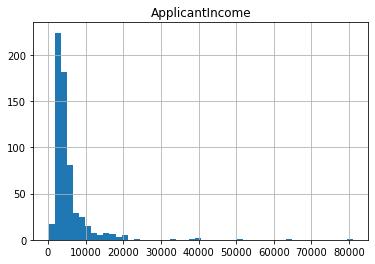

In [12]:
# Histograma de ApplicantIncome
# não aconselho: df['ApplicantIncome'].hist(bins=50)
df.hist(column='ApplicantIncome', bins=50)

Agora podemos usar boxplots para entender melhor as distribuições

<AxesSubplot:>

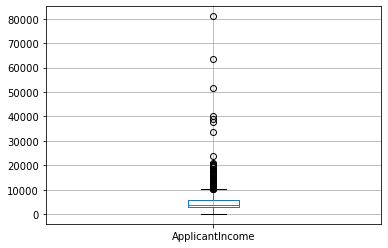

In [13]:
# Boxplot de ApplicantIncome
df.boxplot(column='ApplicantIncome')

O boxplot confirma que temos muitos outliers em nossos dados. Já sabemos que há uma grande diferença entre quanto dinheiro cada indivíduo ganha, e muito disso está relacionado ao seu nível de escolaridade. Vamos dividir os graduados universitários e os não graduados em grupos.

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

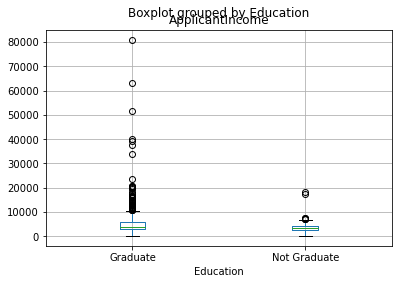

In [14]:
# Boxplot de ApplicantIncome by Education
df.boxplot(column='ApplicantIncome', by='Education')

Agora vamos fazer uma análise semelhante da variável LoanAmount.

array([[<AxesSubplot:title={'center':'LoanAmount'}>]], dtype=object)

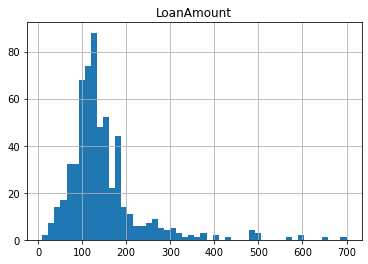

In [15]:
# Histograma de LoanAmount
df.hist(column='LoanAmount', bins=50)

<AxesSubplot:>

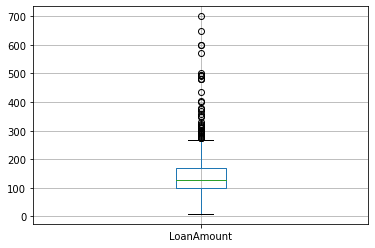

In [16]:
# Boxplot de LoanAmount
df.boxplot(column='LoanAmount')

<AxesSubplot:title={'center':'LoanAmount'}, xlabel='Education'>

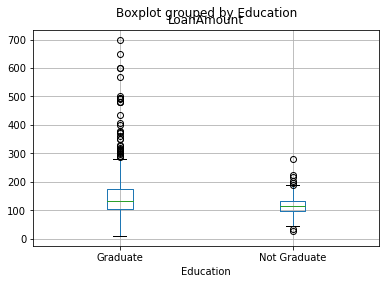

In [17]:
# Boxplot de LoanAmount by Education
df.boxplot(column='LoanAmount', by='Education')

Resultados extremamente interessantes e claros. É óbvio que ApplicantIncome e LoanAmount exigirão algum processamento de dados e munging (transformação de dados crus/ruidosos) para nos dar melhores resultados.

Há mais um *plot* (gráfico) que devemos examinar antes de continuar: se ser autônomo é ou não um fator na aprovação de um empréstimo.

<AxesSubplot:title={'center':'LoanAmount'}, xlabel='Self_Employed'>

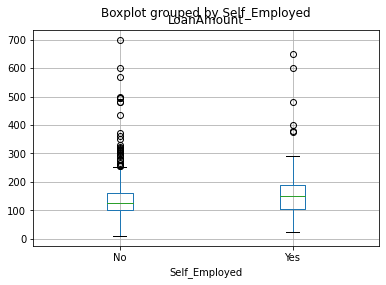

In [18]:
# Boxplot de LoanAmount by Self_Employed
df.boxplot(column='LoanAmount', by='Self_Employed')

### Exercício

Quais são alguns outros boxplots e histogramas que você gostaria de examinar? Reserve algum tempo agora para fazer suas próprias investigações sobre algumas variáveis.

<AxesSubplot:title={'center':'LoanAmount'}, xlabel='Self_Employed'>

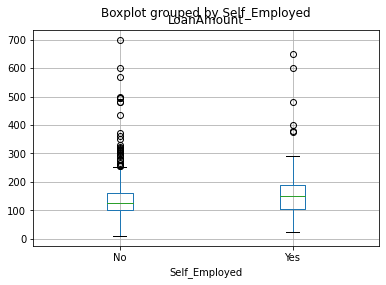

In [19]:
df.boxplot(column='LoanAmount', by='Self_Employed')

<AxesSubplot:title={'center':'LoanAmount'}, xlabel='Property_Area'>

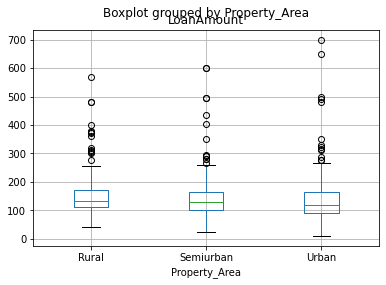

In [20]:
df.boxplot(column='LoanAmount', by='Property_Area')

### Análise de dados categóricos

O que são dados categóricos? Neste caso, estamos nos referindo a dados não-numéricos, como palavras, ou categorias. O que podemos fazer com esse tipo de dados para obter um melhor entendimento?

Vejamos as chances de uma pessoa obter um empréstimo com base apenas no histórico de crédito. Veremos os dados Loan_Status que são N ou Y. Usaremos uma tabela pivô do pandas para visualizar esta relação.

In [21]:
# Primeiro, criaremos uma tabela de frequência temp1 na coluna Credit_History para ver como ela é distribuída.
temp1 = df['Credit_History'].value_counts()

print ('Frequency Table for Credit History:') 
print (temp1)

Frequency Table for Credit History:
1.0    475
0.0     89
Name: Credit_History, dtype: int64


In [22]:
# Vamos também criar uma tabela pivô que nos mostra a probabilidade de aprovação do empréstimo quando você considera o histórico de crédito.
# Loan_Status é rotulado 1 para aprovado e 0 para não aprovado, isso significa a média de todos
# os valores são a probabilidade de obter um empréstimo.
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

print ('\nProbabilidade de conseguir um empréstimo baseado em Credit_History:')
print (temp2)


Probabilidade de conseguir um empréstimo baseado em Credit_History:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


### Exercício: Encontre a média da variável Loan_Status

Como podemos encontrar a média da coluna Loan_Status? Dica: os dados são categóricos. Uma forma de resolver isso é descobrir quantas respostas 'Y' existem e, em seguida, dividir pelo número total de valores na coluna.

Dica: Use a função `value_counts` e então divida os valores.

In [23]:
df['Loan_Status'].value_counts()/(422+192)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

In [24]:













# Resposta:
df.Loan_Status.value_counts()/df.Loan_Status.value_counts().sum()

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

Também podemos ver gráficos desses dados. Vamos criar mais gráficos e entender melhor os dados.

<AxesSubplot:title={'center':'Probabilidade de conseguir empréstimo baseado em Credit_History'}, xlabel='Credit_History', ylabel='Probabilidade de Aprovação'>

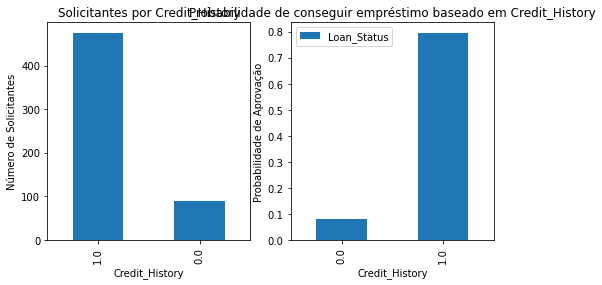

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Número de Solicitantes')
ax1.set_title("Solicitantes por Credit_History")
temp1.plot(kind='bar', ax=ax1)

ax2 = fig.add_subplot(122)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probabilidade de Aprovação')
ax2.set_title("Probabilidade de conseguir empréstimo baseado em Credit_History")
temp2.plot(kind = 'bar', ax=ax2)


Agora tente alterar a variável Credit_History para algo como Self_Employed ou Property_Area. Algumas das variáveis são bem correlacionadas?

<AxesSubplot:title={'center':'Probabilidade de conseguir empréstimo baseado em Self_Employed'}, xlabel='Self_Employed', ylabel='Probabilidade de Aprovação'>

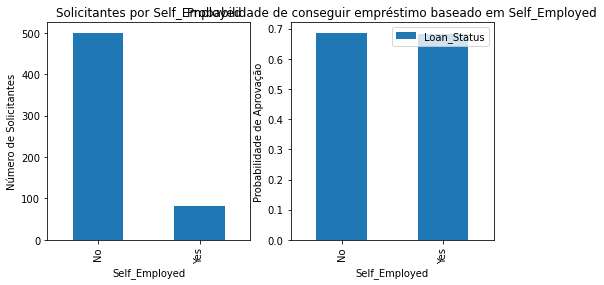

In [26]:
temp1 = df['Self_Employed'].value_counts()
temp2 = df.pivot_table(values='Loan_Status',index=['Self_Employed'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Self_Employed')
ax1.set_ylabel('Número de Solicitantes')
ax1.set_title("Solicitantes por Self_Employed")
temp1.plot(kind='bar', ax=ax1)

ax2 = fig.add_subplot(122)
ax2.set_xlabel('Self_Employed')
ax2.set_ylabel('Probabilidade de Aprovação')
ax2.set_title("Probabilidade de conseguir empréstimo baseado em Self_Employed")
temp2.plot(kind = 'bar', ax=ax2)

Text(0.5, 1.0, 'Probabilidade de conseguir empréstimo baseado em Self_Employed')

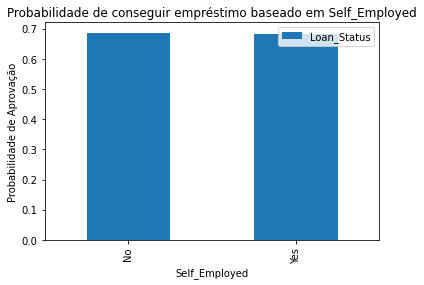

In [27]:






# Resposta
temp3 = df.pivot_table(values='Loan_Status',index=['Self_Employed'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
ax = temp3.plot(kind='bar')
ax.set_ylabel('Probabilidade de Aprovação')
ax.set_title("Probabilidade de conseguir empréstimo baseado em Self_Employed")

### Stacked Charts

Também podemos criar um gráfico empilhado que combina os gráficos acima.

<AxesSubplot:xlabel='Credit_History'>

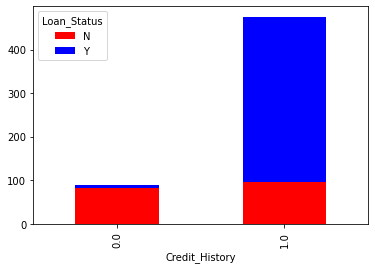

In [28]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [29]:
pd.crosstab?

Signature: pd.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False) -> 'DataFrame'
Docstring:
Compute a simple cross tabulation of two (or more) factors. By default
computes a frequency table of the factors unless an array of values and an
aggregation function are passed.

Parameters
----------
index : array-like, Series, or list of arrays/Series
    Values to group by in the rows.
columns : array-like, Series, or list of arrays/Series
    Values to group by in the columns.
values : array-like, optional
    Array of values to aggregate according to the factors.
    Requires `aggfunc` be specified.
rownames : sequence, default None
    If passed, must match number of row arrays passed.
colnames : sequence, default None
    If passed, must match number of column arrays passed.
aggfunc : function, optional
    If specified, requires `values` be specified as well.
margins : bool, def

Loan_Status                   N    Y
Credit_History Education            
0.0            Graduate      57    6
               Not Graduate  25    1
1.0            Graduate      73  307
               Not Graduate  24   71

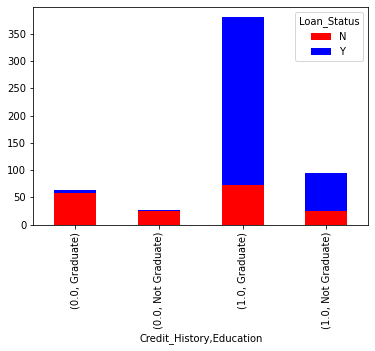

In [30]:
temp3 = pd.crosstab([df['Credit_History'], df['Education']], df['Loan_Status'],)
temp3.plot(kind='bar', stacked=True, color=['red','blue'], )
temp3

**Parabéns!** Você percebeu o que acabamos de fazer? Acabamos de criar dois **algoritmos de classificação básicos!** Criamos o primeiro baseado apenas em Credit_History e, em seguida, criamos com base em Credit_History e Education.

Esta é a última etapa que faremos para explorar nosso conjunto de dados. Pela exploração, sabemos que precisamos lidar com alguns dados sujos. Vamos prosseguir para **Manipulação e Tratamento de Dados.**

### Manipulação de dados e preparação de nossos dados

Na parte anterior de nosso processo, aprendemos sobre alguns dos problemas com nossos dados, especificamente que temos alguns valores ausentes. Para "consertar" esses problemas, precisamos ser extremamente cuidadosos e cuidadosos sobre que tipo de dados usaremos para preencher os valores vazios.

Notamos que nas colunas ApplicantIncome e LoanAmount também havia outliers nas extremidades dos intervalos. Mesmo que entendamos por que os valores são como são, devemos fazer algo com os valores extremos também.

Vamos ver o que podemos fazer com a função `apply`. Primeiro, vamos consultar a sua documentação.

In [31]:
# A função apply aplica uma função ao longo de um dos eixos do dataframe.
# consulta doc de apply
df.apply?

Signature: df.apply(func, axis=0, raw=False, result_type=None, args=(), **kwds)
Docstring:
Apply a function along an axis of the DataFrame.

Objects passed to the function are Series objects whose index is
either the DataFrame's index (``axis=0``) or the DataFrame's columns
(``axis=1``). By default (``result_type=None``), the final return type
is inferred from the return type of the applied function. Otherwise,
it depends on the `result_type` argument.

Parameters
----------
func : function
    Function to apply to each column or row.
axis : {0 or 'index', 1 or 'columns'}, default 0
    Axis along which the function is applied:

    * 0 or 'index': apply function to each column.
    * 1 or 'columns': apply function to each row.

raw : bool, default False
    Determines if row or column is passed as a Series or ndarray object:

    * ``False`` : passes each row or column as a Series to the
      function.
    * ``True`` : the passed function will receive ndarray objects
      instead.
 

In [32]:
# conta entradas nulas em cada coluna
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

A função `lambda` nos permite examinar o dataframe e encontrar todos os campos que contêm um valor nulo.

Observação: embora não tenhamos um grande número de dados ausentes, ainda devemos trabalhar um pouco mais e determinar se podemos preencher os valores com dados de preenchimento que façam sentido. Devemos também conferir as coisas que observamos. Por exemplo, Loan_Amount_Term tem 14 valores nulos. Se um empréstimo for feito com um período de empréstimo igual a 0, ele é nulo? Vamos explorar um pouco mais.

### Preenchendo valores nulos em LoanAmount

Descobrir com o que preencher os valores nulos pode ser complicado, e você deve sempre consultar um especialista do domínio, se possível. Mas, neste caso, provavelmente podemos usar a quantia média do empréstimo para preencher os valores nulos. Faremos isso primeiro.

In [33]:
df_copy = df.copy()
# preencher NA com df_copy['LoanAmount'].mean()
media = df_copy['LoanAmount'].mean()

In [34]:
df_copy['LoanAmount'].fillna(media, inplace=True)

In [35]:
# Vamos verificar; não devemos ver nenhum valor nulo na coluna LoanAmount
df_copy.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [36]:
# Podemos descobrir qual é o valor de preenchimento para o montante do empréstimo usando mean


O procedimento anterior mostra a forma mais simples de preencher os dados ausentes. No entanto, ela possui pelo menos 2 problemas:

1) A média é muito sensível a outliers. Valores muito altos podem fazer com que a média não seja muito representativa. De fato, sabemos que os valores do empréstimo podem variar bastante. Neste caso, usar a mediana pode ser um pouco melhor.

2) Da nossa etapa de exploração, sabemos que o valor do empréstimo (LoanAmount) está correlacionado com o nível de escolaridade (Education) e com ser autônomo (Self_Employed). Será que podemos usar essa informação para melhorar a forma como preenchemos LoanAmount? Um dos problemas que temos que resolver primeiro é a presença de valores ausentes em Self_Employed.

### Preenchendo valores na coluna Self_Employed

De nossa etapa de exploração, sabemos que o valor do empréstimo (LoanAmount) está correlacionado com o nível de escolaridade (Education) e com ser autônomo (Self_Employed).

AxesSubplot(0.1,0.15;0.8x0.75)
AxesSubplot(0.1,0.15;0.8x0.75)


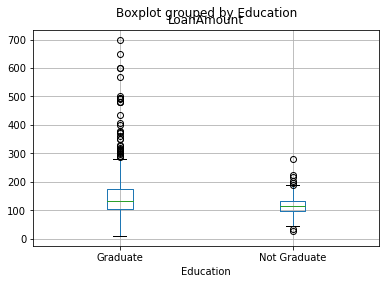

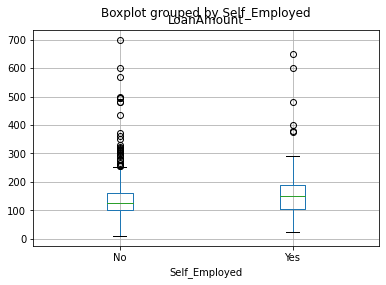

In [37]:
print(df.boxplot(column='LoanAmount', by = 'Education'))
print(df.boxplot(column='LoanAmount', by = 'Self_Employed'))

Podemos usar esses boxplots para detectar tendências em nossos dados, e vemos alguma variação entre o valor médio do empréstimo, de modo que pode ser usado para imputar os dados. Vamos verificar se Self_Employed e Education possuem algum valor nulo ou ausente.

In [38]:
# Counts para Self_Employed
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [39]:
# Agora podemos calcular a porcentagem de respostas 'Não'
print('Porcentagem de valores "No" nos dados é:', 500/582*100,'%')

Porcentagem de valores "No" nos dados é: 85.91065292096219 %


Como cerca de 86% das respostas nesta coluna são `No`, é seguro para nós imputar os valores ausentes como valores "não". Podemos fazer isso com este código:

In [40]:
# Preencher Self_Employed com 'No'
df['Self_Employed'].fillna('No', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Dependents         599 non-null    object 
 2   Education          614 non-null    object 
 3   Self_Employed      614 non-null    object 
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         592 non-null    float64
 7   Loan_Amount_Term   600 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


A próxima etapa é criar uma tabela pivô, que nos fornecerá os valores medianos para todos os grupos de valores exclusivos dos recursos Self_Employed e Education. Em seguida, definimos uma função, que retorna os valores dessas células e a aplica para preencher os valores ausentes do montante do empréstimo:

In [41]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed', columns='Education', aggfunc=np.median)
table

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


In [42]:
# Defina a função para retornar o valor desta pivot_table
def geraValorFalso(x):
 return table.loc[x['Self_Employed'],x['Education']]

In [43]:
# Substitua os valores ausentes
df['LoanAmount'].fillna(df.apply(geraValorFalso, axis=1), inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Dependents         599 non-null    object 
 2   Education          614 non-null    object 
 3   Self_Employed      614 non-null    object 
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   600 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


### Usando uma transformação de log para anular o efeito de valores extremos

Vejamos primeiro LoanAmount. Já sabemos que as pessoas solicitam empréstimos em todas as faixas, incluindo empréstimos de alto valor para propriedades específicas. Em vez de tratá-los como outliers, podemos usar uma transformação de log para reduzir o efeito que eles têm na representação dos dados.

<AxesSubplot:>

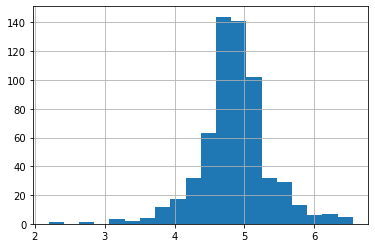

In [45]:
# Vamos plotar o histograma novamente
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

Agora, esta distribuição parece melhor. O efeito dos valores-limite superiores foi consideravelmente reduzido. Especificamente, não existem mais valores muito maiores ou muito menores que a média.

Mais uma coisa a ser observada ao considerar a Renda do Requerente. Você notou que também havia um CoapplicantIncome? Pode ser uma boa ideia combinar essas colunas em uma coluna TotalIncome e fazer uma transformação de log.

<AxesSubplot:>

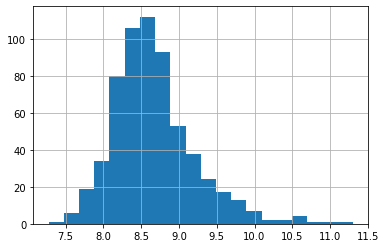

In [46]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20) 

A distribuição novamente é melhor do que antes (sem a tranformação log). Você pode decidir se vai ou não continuar o exercício de manipulação com Sexo, Casado, Dependentes ou as outras variáveis.

### Construindo um modelo preditivo em Python

Até agora, passamos muito tempo preparando nossos dados, preparando-os para o nosso modelo. Estaremos usando uma nova biblioteca (para nós) para codificar nosso modelo. Scikit-Learn (sklearn) é a biblioteca de ciência de dados mais comumente usada em Python para essa finalidade.

Scikit-Learn requer que todas as entradas sejam numéricas, mas primeiro vamos preencher rapidamente todos os valores nulos em nossos dados.

Por uma questão de tempo, preparamos todo o código para você aqui.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Dependents         599 non-null    object 
 2   Education          614 non-null    object 
 3   Self_Employed      614 non-null    object 
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   600 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    object 
 11  LoanAmount_log     614 non-null    float64
 12  TotalIncome        614 non-null    float64
 13  TotalIncome_log    614 non-null    float64
dtypes: float64(7), int64(1), object(6)
memory usage: 67.3+ KB


In [48]:
# Preenchimento rápido
# df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
# df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [49]:
# Vamos checar! Tudo devidamente resolvido.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Dependents         614 non-null    object 
 2   Education          614 non-null    object 
 3   Self_Employed      614 non-null    object 
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    object 
 10  Loan_Status        614 non-null    object 
 11  LoanAmount_log     614 non-null    float64
 12  TotalIncome        614 non-null    float64
 13  TotalIncome_log    614 non-null    float64
dtypes: float64(7), int64(1), object(6)
memory usage: 67.3+ KB


In [50]:
# Agora podemos terminar o modelo
# Importar modelos do módulo de aprendizado do scikit:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#Função genérica que treina um modelo e avalia a qualidade das previsões:
def loan_model(model, data, predictors, outcome):
  #Faz o fit (ajuste) do modelo:
  model.fit(data[predictors],data[outcome])

  #Calcula as previsões no conjunto de treino:
  predictions = model.predict(data[predictors])
  
  #Imprime a acurácia
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Acurácia (Treino): %s" % "{0:.3%}".format(accuracy))

  #Retorna o modelo para que ele possa ser chamado fora da função:
  return model 

### Construindo um modelo de regressão logística

Lembre-se de que a regressão logística é um modelo que retorna uma resposta binária. Nesse caso, ele retornará se o empréstimo deve ser aprovado ou não com base nos parâmetros fornecidos.

Queremos criar um modelo que generalize bem. Se pegarmos todos os dados e os usarmos para treinar nosso modelo, corremos o risco de 'overfitting' o modelo.

Vamos primeiro começar fazendo algumas hipóteses simples sobre como as chances de alguém conseguir um empréstimo serão maiores.

1. Sabemos que já ter um histórico de crédito é uma enorme vantagem.
2. Rendas mais altas, combinando as rendas do co-aplicante e do requerente ajudarão.
3. Também vimos que candidatos com ensino superior obtêm empréstimos.
4. Também sabemos que propriedades em locais de alto crescimento farão empréstimos melhores.

In [52]:
# Vamos primeiro criar um modelo usando apenas Credit_History como feature - Primeiro atribuímos Loan_Status à variável de saída
outcome_var = 'Loan_Status'

# Instanciar o modelo
model = LogisticRegression()

# Usar apenas o histórico de crédito
predictors = ['Credit_History']

# Chamar o modelo
model = loan_model(model, df, predictors, outcome_var)

Acurácia (Treino): 80.945%


Você consegue melhorar o resultado anterior? Dica: tente utilizar mais preditores, por exemplo:

```predictor_var = ['Credit_History','LoanAmount_log','TotalIncome_log']```

In [ ]:








# Resposta
# Usar apenas o histórico de crédito
predictor_var = ['Credit_History','LoanAmount_log','TotalIncome_log']

# Chamar o modelo
model = loan_model(model, df, predictor_var, outcome_var)

### BONUS:  Decision Tree and Random Forest

A decision tree is another predictive model. We can easily import the model from the sklearn library. In addition we can also do the same thing for the Random Forest model, which is a classification model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz

model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
loan_model(model, df,predictor_var,outcome_var)

Can you do any better? Play with the code and try to get a higher accuracy value

### One possible solution

In [ ]:
# Let's try using the RandomForestClassifier model. Random Forest Classifier
# A random forest is a meta estimator that fits a number of decision tree classifiers 
# on various sub-samples of the dataset and uses averaging to improve the predictive 
# accuracy and control over-fitting. 
model = RandomForestClassifier(n_estimators=10) # n_estimators == number of trees in the forest
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area',
        'LoanAmount_log']
loan_model(model, df,predictor_var,outcome_var)

### Key Takeaways

1. Using a more sophisticated model does not guarantee better results.
2. Avoid using complex modeling techniques as a black box without understanding the underlying concepts. Doing so would increase the tendency of overfitting thus making your models less interpretable
3. Feature Engineering is the key to success. Everyone can use the prebuilt models but the real art and creativity lies in enhancing your features to better suit the model.